In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [43]:

def luedeking_piret(t, y, vmax, km, y_coeff, alpha, beta, m):
    x, s, p = y
    mu = vmax * s / (km + s)
    dxdt = mu * x - (m * x)
    dsdt = -1/y_coeff * (mu * x)
    dpdt = alpha * mu * x + beta * x
    return (dxdt, dsdt, dpdt)

X0 = 0.1   # Initial biomass concentration (g/L)
S0 = 20.0  # Initial substrate concentration (g/L)
P0 = 0.0   # Initial product concentration (g/L)
km = 0.5   # Monod constant (g/L)
alpha = 0.3  # Growth-associated product formation coefficient
beta = 0.02  # Non-growth-associated product formation coefficient
y_coeff = 0.5  # Yield coefficient (g biomass / g substrate)
vmax = 0.6  # Maximum specific growth rate (1/h)
m = 0.1 # Maintenance term
t_span = (0, 30)  # Time span for the integration
 

solution = solve_ivp(luedeking_piret, t_span, [X0, S0, P0], args=(vmax, km, y_coeff, alpha, beta, m))

    
t = solution.t
X = solution.y[0]
S = solution.y[1]
P = solution.y[2]



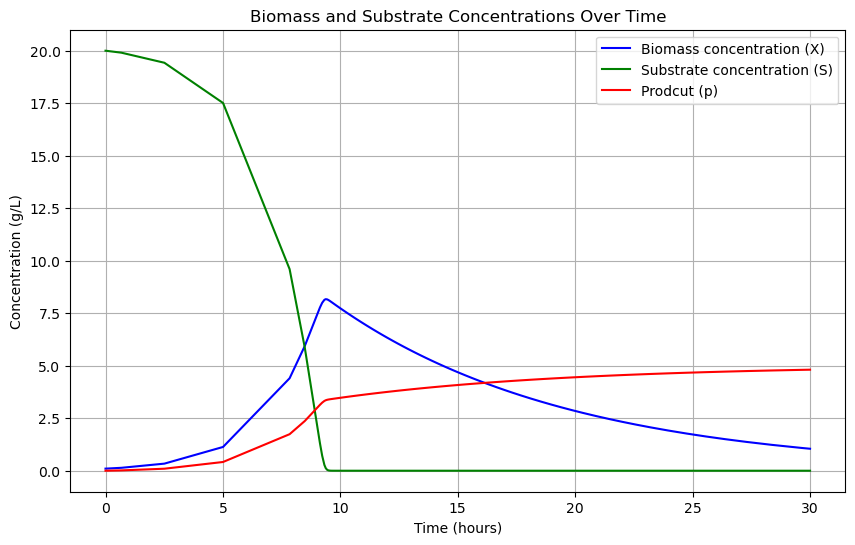

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='Biomass concentration (X)', color='b')
plt.plot(t, S, label='Substrate concentration (S)', color='g')
plt.plot(t, P, label='Prodcut (p)', color='r')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/L)')
plt.legend()
plt.title('Biomass and Substrate Concentrations Over Time')
plt.grid(True)
plt.show()

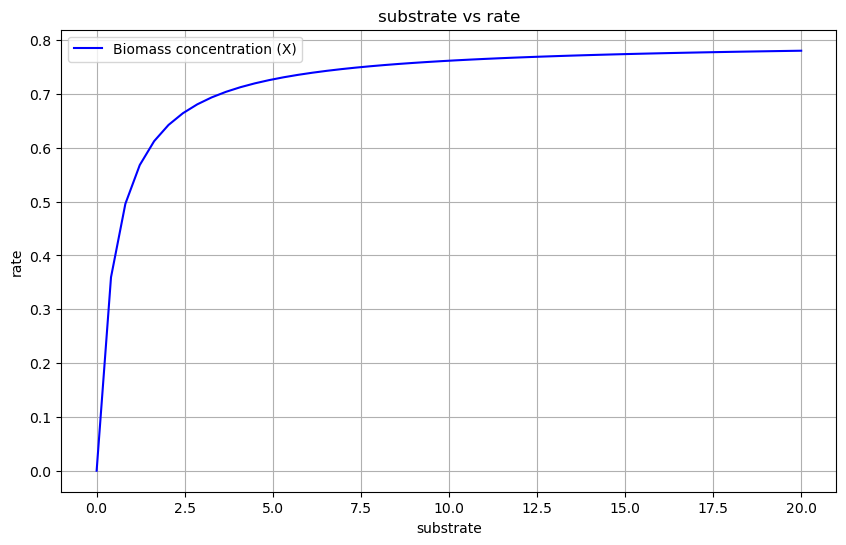

In [45]:
## seeing if I can get the rate versus substrate graph
s = np.linspace(0, 20)
km = 0.5
vmax = 0.8
mu = vmax * s / (km + s)

plt.figure(figsize=(10, 6))
plt.plot(s, mu, label='Biomass concentration (X)', color='b')
plt.xlabel('substrate')
plt.ylabel('rate')
plt.legend()
plt.title('substrate vs rate')
plt.grid(True)
plt.show()